# mammographic masses

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing datasets

In [2]:
data = pd.read_csv("mammographic_masses.csv",na_values='?')
data.head()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,4.0,43.0,1.0,1.0,NaN,1
1,5.0,58.0,4.0,5.0,3.0,1
2,4.0,28.0,1.0,1.0,3.0,0
3,5.0,74.0,1.0,5.0,NaN,1
4,4.0,65.0,1.0,NaN,3.0,0


In [3]:
data.columns

Index(['BI-RADS assessment', 'Age', 'Shape', 'Margin', 'Density', 'Severity'], dtype='object')

# Spliting Data for training and testing

In [4]:
from sklearn.model_selection import train_test_split
X_Data=data[['BI-RADS assessment', 'Age', 'Shape', 'Margin']]
y_Data=data[['Severity']]
X_train,X_test,y_train,y_test = train_test_split(X_Data,y_Data,test_size=0.2,random_state=42)

In [5]:
data.isnull().sum(axis=0)

BI-RADS assessment     2
Age                    5
Shape                 31
Margin                48
Density               76
Severity               0
dtype: int64

# Data imputation 

In [6]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

X_train_imputed=imputer.fit_transform(X_train)
X_test_imputed=imputer.fit_transform(X_test)

#imputer.transform(X_train)
#imputer.transform(X_test)



# Decision Trees

In [7]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train_imputed, np.ravel(y_train,order='C'))
predictDT=modelDT.predict(X_test_imputed)

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       102
           1       0.75      0.61      0.67        90

    accuracy                           0.72       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.73      0.72      0.72       192



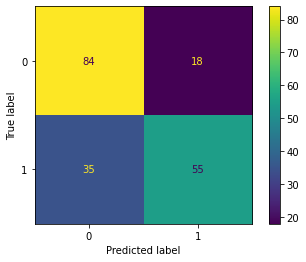

In [8]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictDT)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictDT))


# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
modelRFC=RandomForestClassifier()
modelRFC.fit(X_train_imputed, np.ravel(y_train,order='C'))
predictRFC=modelRFC.predict(X_test_imputed)

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       102
           1       0.81      0.73      0.77        90

    accuracy                           0.80       192
   macro avg       0.80      0.79      0.79       192
weighted avg       0.80      0.80      0.80       192



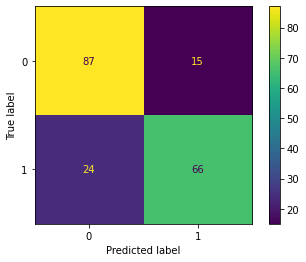

In [10]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictRFC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictRFC))

# Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
modelGNB.fit(X_train_imputed, np.ravel(y_train,order='C'))
predictGNB=modelGNB.predict(X_test_imputed)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       102
           1       0.86      0.77      0.81        90

    accuracy                           0.83       192
   macro avg       0.84      0.83      0.83       192
weighted avg       0.84      0.83      0.83       192



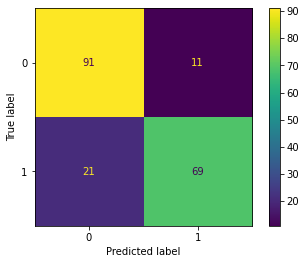

In [12]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictGNB)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictGNB))

# AdaBoost

In [13]:
from sklearn.ensemble import AdaBoostClassifier
modelAda = AdaBoostClassifier()
modelAda.fit(X_train_imputed, np.ravel(y_train,order='C'))
predictAda=modelAda.predict(X_test_imputed)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       102
           1       0.86      0.78      0.82        90

    accuracy                           0.84       192
   macro avg       0.84      0.83      0.84       192
weighted avg       0.84      0.84      0.84       192



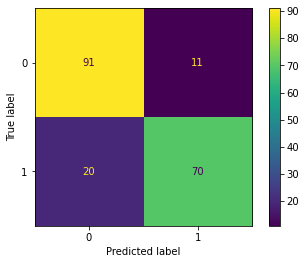

In [14]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictAda)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictAda))

# Data normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train_imputed)
X_train_normalized = scaler.transform(X_train_imputed)

#scaler.fit(y_train)
#y_train_normalized = scaler.transform(y_train)

scaler.fit(X_test_imputed)
X_test_normalized = scaler.transform(X_test_imputed)

#scaler.fit(y_train)
#y_test_normalized = scaler.transform(y_test)

# K-Nearest Neighbours

In [16]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN =  KNeighborsClassifier()
modelKNN.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictKNN=modelKNN.predict(X_test_normalized)

              precision    recall  f1-score   support

           0       0.93      0.52      0.67       102
           1       0.64      0.96      0.76        90

    accuracy                           0.72       192
   macro avg       0.78      0.74      0.72       192
weighted avg       0.79      0.72      0.71       192



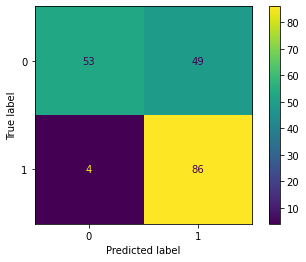

In [17]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictKNN)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictKNN))


# Support Vector Machine

In [18]:
#Support Vector Classifier
from sklearn.svm import SVC
modelSVC = SVC(probability= True)
modelSVC.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictSVC=modelSVC.predict(X_test_normalized)

              precision    recall  f1-score   support

           0       0.92      0.46      0.61       102
           1       0.61      0.96      0.74        90

    accuracy                           0.69       192
   macro avg       0.77      0.71      0.68       192
weighted avg       0.78      0.69      0.68       192



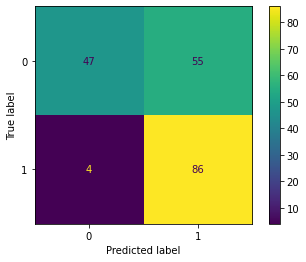

In [19]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictSVC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictSVC))

In [20]:
# Linear Support Vector Classifier
from sklearn.svm import LinearSVC
modelLSVC = LinearSVC()
modelLSVC.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictLSVC=modelLSVC.predict(X_test_normalized)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.47      1.00      0.64        90

    accuracy                           0.47       192
   macro avg       0.23      0.50      0.32       192
weighted avg       0.22      0.47      0.30       192



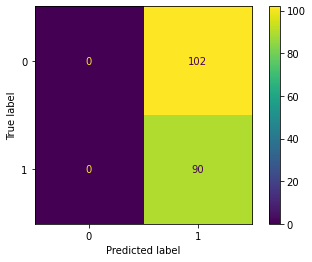

In [21]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictLSVC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictLSVC))

# Multi-Layer Perceptron

In [22]:
from sklearn.neural_network import MLPClassifier
modelMLP =  MLPClassifier()
modelMLP.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictMLP=modelMLP.predict(X_test_normalized)

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       102
           1       0.47      1.00      0.64        90

    accuracy                           0.48       192
   macro avg       0.74      0.51      0.34       192
weighted avg       0.75      0.48      0.32       192



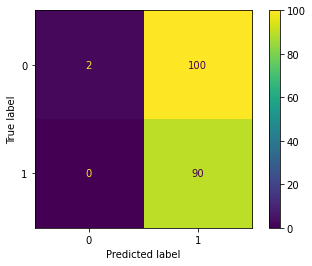

In [23]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictMLP)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictMLP))

# ROC and AUC 

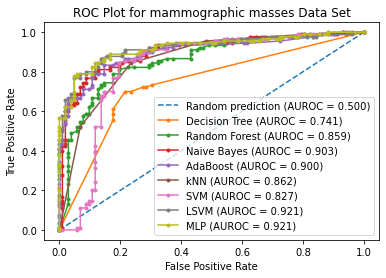

In [24]:
r_probs =[0 for _ in range(len(y_test))]
dt_probs=modelDT.predict_proba(X_test_imputed)
rf_probs=modelRFC.predict_proba(X_test_imputed)
nb_probs=modelGNB.predict_proba(X_test_imputed)
ada_probs=modelAda.predict_proba(X_test_imputed)
knn_probs=modelKNN.predict_proba(X_test_normalized)
svm_probs=modelSVC.predict_proba(X_test_normalized)
lsvm_probs=modelLSVC._predict_proba_lr(X_test_normalized)
mlp_probs=modelMLP.predict_proba(X_test_normalized)

dt_probs=dt_probs[:,1]
rf_probs=rf_probs[:, 1]
nb_probs=nb_probs[:, 1]
ada_probs=ada_probs[:, 1]
knn_probs=knn_probs[:, 1]
svm_probs=svm_probs[:, 1]
lsvm_probs=lsvm_probs[:, 1]
mlp_probs=mlp_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score

r_auc=roc_auc_score(y_test,r_probs)
dt_auc= roc_auc_score(y_test,dt_probs)
rf_auc= roc_auc_score(y_test,rf_probs)
nb_auc= roc_auc_score(y_test,nb_probs)
ada_auc= roc_auc_score(y_test,ada_probs)
knn_auc= roc_auc_score(y_test,knn_probs)
svm_auc= roc_auc_score(y_test,svm_probs)
lsvm_auc= roc_auc_score(y_test,lsvm_probs)
mlp_auc= roc_auc_score(y_test,mlp_probs)

r_fpr,r_tpr, _ = roc_curve(y_test,r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test,dt_probs)
rf_fpr, rf_tpr, _= roc_curve(y_test,rf_probs)
nb_fpr, nb_tpr, _= roc_curve(y_test,nb_probs)
ada_fpr, ada_tpr, _= roc_curve(y_test,ada_probs)
knn_fpr, knn_tpr, _= roc_curve(y_test,knn_probs)
svm_fpr, svm_tpr, _= roc_curve(y_test,svm_probs)
lsvm_fpr, lsvm_tpr, _= roc_curve(y_test,lsvm_probs)
mlp_fpr, mlp_tpr, _= roc_curve(y_test,mlp_probs)

import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost (AUROC = %0.3f)' % ada_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='kNN (AUROC = %0.3f)' % knn_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(lsvm_fpr, lsvm_tpr, marker='.', label='LSVM (AUROC = %0.3f)' % lsvm_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP (AUROC = %0.3f)' % mlp_auc)

# Title
plt.title('ROC Plot for mammographic masses Data Set')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()